In [13]:
import numpy as np
import pandas as pd
from numpy.random import shuffle
from numpy.random import randint
from random import choice
import matplotlib.pyplot as plt

In [14]:
class Point():
 
    COUNT = 0
 
    def __init__(self, x, y):
        self.X = x
        self.Y = y
 
    def __str__(self):
        return "Point(%s,%s)"%(self.X, self.Y) 
 
    def distance(self, other):
        dx = self.X - other.X
        dy = self.Y - other.Y
        return np.sqrt(dx**2 + dy**2)
    
    def __eq__(self, other): 
        return self.X == other.X and self.Y == other.Y
    
class Individu():
 
    def __init__(self, init = False, map_point = []):
        self.score = 0
        self.route = []
        if init :
            shuffle(map_point)
            self.set_route(map_point)

    def set_route(self, map_point) :
        
        self.route = map_point
        for p in range(len(map_point) - 1) :
            self.score += map_point[p].distance(map_point[p+1])

    def croisement(self, other):
        child = Individu()
        # je prends la moitier de moi-même.
        half = int(np.floor(len(self.route)/2))
        first_segment = self.route[:half]
        last_segment  = []
        # je complète avec l'autre
        for i in range(len(self.route)) :
            if other.route[i] not in first_segment :
                last_segment.append(other.route[i])
        child.set_route(first_segment + last_segment)
        return child
 
    def show_me(self):
        plt.figure(figsize=(5,5))
        xpoint=[]
        ypoint=[]
        for i,point in enumerate(self.route) :
            xpoint.append(point.X)
            ypoint.append(point.Y)
            x,y=point.X, point.Y
            plt.scatter(x,y)
            plt.text(x,y,'A'+str(i))
        plt.plot(xpoint,ypoint)
        plt.show()

In [15]:
population=[]
a_map=[]
# initialisation des points de la carte.
# prend en paramètre un nombre de points.
def init_map(nb):
    global a_map
    del a_map[:]
    for i in range(nb):
        p = Point(randint(1, 300), randint(1, 300))
        a_map.append(p)
# initialisation de la population.
# prend en paramètre le nombre d'individus à créer.
def init_pop(nb, map_point):
    global population
    del population[:]
    for i in range(nb):
        i = Individu(True, map_point.copy())
        population.append(i)

# fonction qui sert à trier les individus suivant leur score.
# utile pour trouver les meilleurs.
def selection(pop):
    pop.sort(key=lambda x: x.score, reverse=False)

def croisement(pop,nbtop):
    new_pop = []
    best_pop = population[0:nbtop]
    for i in range(len(pop)-nbtop) :
        new_pop.append(choice(best_pop).croisement(choice(population[nbtop:])))
    return new_pop + best_pop

def play(nb_generation, nb_point,nbpop,nbtop,seed) :
    np.random.seed(seed)
    init_map(nb_point)
    init_pop(nbpop, a_map)
    best=[]
    result=0
    for i in range(nb_generation) :
        global population
        selection(population)
        population = croisement(population,nbtop)
        best_score = population[0].score
        best.append(best_score)
        if best_score<1000:
            print ('Meilleur score : ' + str(population[0].score))
            plt.title("Score en fonction de la génération")
            plt.plot(best)
            population[0].show_me()
            break


Meilleur score : 983.427990010348


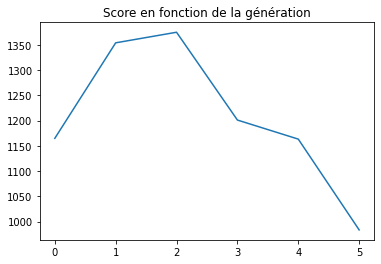

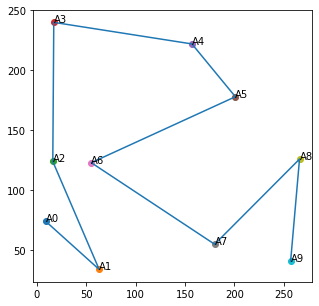

In [16]:
play(nb_generation=40,nbpop=100,nb_point=10,nbtop=20,seed=10)